


# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

### 0. Establezca las siguientes condiciones inciales.
         





In [6]:
import numpy as np

v0 = 50 #Velocidad en m/s
α = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.


### 1. Defina dos funciones, una para x y otra para y. 


In [7]:
pos_x = lambda t, θ: (u * np.cos(α) * t) + (1/b) * (v0*np.cos(θ) - u*np.cos(α)) * (1 - np.exp(-b*t))

In [8]:
pos_y = lambda t, θ: (1/b) * (g/b + v0*np.sin(θ) - u*np.sin(α)) * (1 - np.exp(-b*t)) - (g/b - u*np.sin(α))*t 

In [9]:
from scipy import optimize

In [10]:
optimize.newton(pos_y,5,args = [theta])

6.827653967594583

### 2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [11]:
import pandas as pd 
t = np.linspace(0,10,100)
dic = {'X',
       'Y',
       'Tiempo'}
dic

{'Tiempo', 'X', 'Y'}

### 3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


In [18]:
t = np.linspace(0,20,1000)
df= {'X': pos_x(t,theta),
       'Y' : pos_y(t,theta),
       'Tiempo': t,}
df = pd.DataFrame.from_dict(df)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,0.707210,0.705497,0.02002
2,1.413212,1.406363,0.04004
3,2.118006,2.102601,0.06006
4,2.821595,2.794217,0.08008
...,...,...,...
995,263.257394,-986.244329,19.91992
996,263.202967,-988.458351,19.93994
997,263.148095,-990.674084,19.95996
998,263.092777,-992.891526,19.97998


### 4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

Text(0, 0.5, 'y')

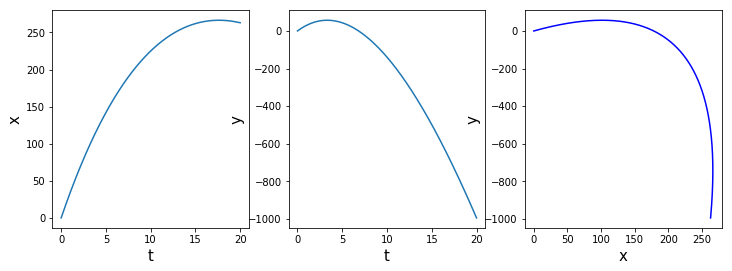

In [50]:
from matplotlib import pyplot as plt


plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(df.Tiempo, df.X)
plt.xlabel("t", size=15)
plt.ylabel("x", size=15)

plt.subplot(132)
plt.plot(df.Tiempo, df.Y)
plt.xlabel("t", size=15)
plt.ylabel("y", size=15)

plt.subplot(133)
plt.plot(df.X ,df.Y,"b-")
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)

### 5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

In [187]:
from scipy import optimize

In [46]:
tiempo = optimize.newton(pos_y,6, args = [theta])
tiempo

6.82765396759459

In [47]:
print('El alcance máximo es: {:.3f} m'.format(pos_x(tiempo,theta)))

El alcance máximo es: 178.420 m


Text(0, 0.5, 'y')

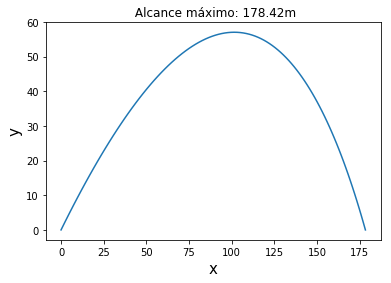

In [51]:
tv = np.linspace(0, tiempo, 100)
plt.plot(pos_x(tv, theta),pos_y(tv, theta))
plt.title(f" Alcance máximo: {pos_x(tiempo, theta):.2f}m")
plt.xlabel("x",size=15)
plt.ylabel("y",size = 15)


### 6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

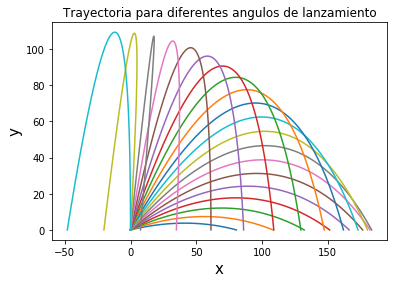

In [72]:
theta = np.linspace(10,90,20)
theta = np.deg2rad(theta)

R = np.zeros(len(theta))
theta[0]

for i in range(0,len(theta)):
    
    tv = optimize.newton(pos_y,7,args=[theta[i]])
    R[i] = pos_x(tv,theta[i])
    t = np.linspace(0,tv,100)  
    plt.plot(pos_x(t,theta[i]), pos_y(t, theta[i]))
    plt.xlabel('x',size=15)
    plt.ylabel('y',size=15)
    plt.title('Trayectoria para diferentes angulos de lanzamiento')
    
    

Text(0.5, 1.0, 'R vs θ')

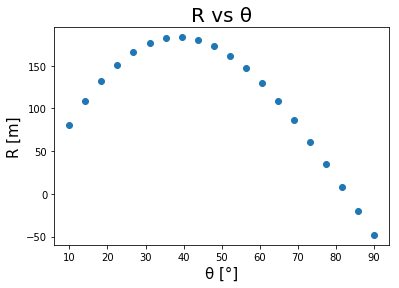

In [73]:
plt.plot(np.rad2deg(theta),R,'o')
plt.xlabel('θ [°]', size=15)
plt.ylabel('R [m]', size=15)
plt.title('R vs θ', size=20)


### 7.Realice una interpolacion de R como función de theta.



In [76]:
pol = np.polynomial.hermite.Hermite.fit(theta,R, 3)

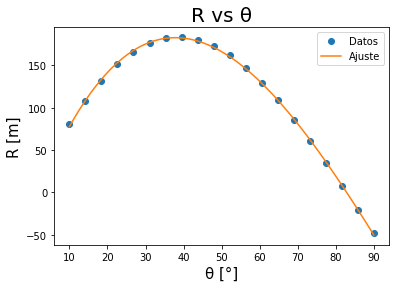

In [81]:
t = np.linspace(10,90,100)
t = np.deg2rad(t)
plt.plot(np.rad2deg(theta),R,'o',label='Datos')
plt.plot(np.rad2deg(t),pol(t),label='Ajuste')
plt.xlabel('θ [°]', size=15)
plt.ylabel('R [m]', size=15)
plt.title('R vs θ', size=20)
plt.legend()


### Determinar el angulo para el cual el movimiento se invierte

Para esto basta encontrar la raiz del polinomio de ajuste, en este caso, como es un polinomio de numpy podemos usar los métodos para polinomios.

In [90]:
np.rad2deg(pol.roots())

array([  1.80751488,  82.86536075, 216.76349311])

En este caso la raiz que estamos buscando es la segunda raiz.

In [93]:
print('El movimiento se invierte en {:.3f} °'.format(np.rad2deg(pol.roots())[1]))

El movimiento se invierte en 82.865 °


### El maximo valor de la curva del alcance maximo, como funcion del angulo

Para esto podemos derivar el polinomio obtenido para R con los métodos propios de numpy. Encontrar la raiz del nuevo polinomio obtenido nos da el valor del angulo en el cual se obtiene el alcance máximo. Al evaluarlo en el polinomio original obtenemos el alcance máximo que se logra.

In [99]:
d_pol = pol.deriv()
roots = d_pol.roots()
np.rad2deg(roots)

array([ 37.80451841, 163.15306075])

In [103]:
pol(roots[0])

182.8631905003679

In [105]:
print('El alcance máximo que se puede lograr es: {:.3f} m y se da con un ángulo de: {:.3f} °'.format(pol(roots[0]),np.rad2deg(roots)[0]))

El alcance máximo que se puede lograr es: 182.863 m y se da con un ángulo de: 37.805 °


# 2.0 Interpolación lagrange

Consideremos la función:

\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}

en el intervalo $[-1,1]$ , definamos un conjunto de puntos $n+1$ equiespaciados en $[-1,1]$. 


### 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, n=\{ 4, 8, 12, 16, 20 \} 

In [7]:
from scipy import interpolate

In [8]:
f = lambda x: 1/(1+25*x**2)

Para n=4

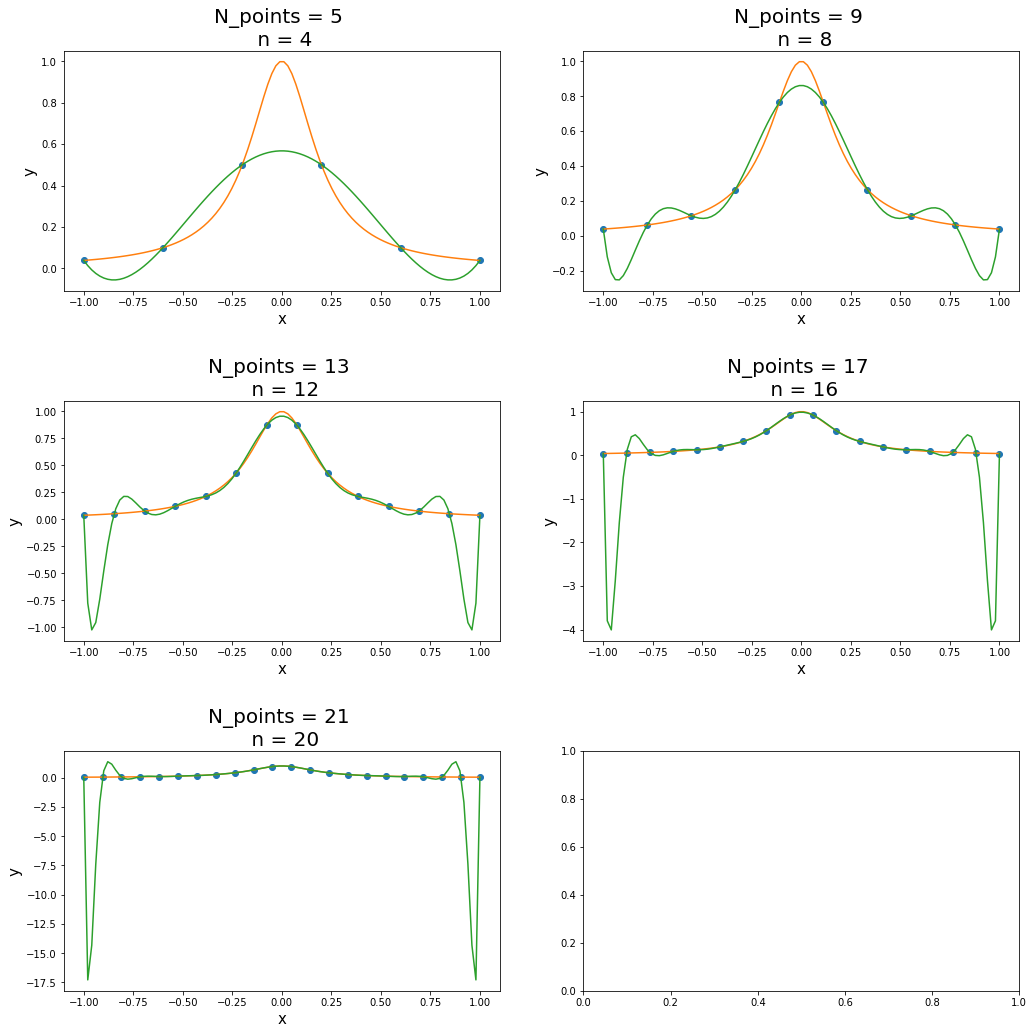

In [9]:
points = [5,9,13,17,21] # n + 1 points

fig,axs = plt.subplots(3,2,figsize=(15,15))

count = 0
for i in range(0,3):
    for j in range(0,2):
        x = np.linspace(-1,1,points[count]+1)
        t = np.linspace(-1,1,100)
        poli = interpolate.lagrange(x,f(x))
        axs[i,j].plot(x,f(x),'o')
        axs[i,j].plot(t,f(t))
        axs[i,j].plot(t,poli(t)) 
        axs[i,j].set_title('N_points = {} \n n = {}'.format(points[count],points[count]-1),size=20)
        axs[i,j].set_xlabel('x',size=15)
        axs[i,j].set_ylabel('y',size=15)
        count += 1
        if count == len(points):
            break
fig.tight_layout(pad=3)

### 2.  Comprobar gráficamente cómo el error aumenta con n . Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

Para este numeral, emplee que:

La cota del error , viene dado por: 

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

Para n=4 tenemos entonces que: 

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(5)!} f^{(5)}(\xi)(x - x_0)(x - x_1) (x - x_2) (x - x_3) (x - x_4)
\end{equation}


 Para n=4, n_points = 5 

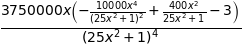

In [75]:
import sympy as sp
sp.init_printing()

x = sp.Symbol('x')
f5 = sp.diff(f(x),x,5)
f5

In [76]:
f5 = sp.lambdify(x,f5,'numpy')
points = np.linspace(-1,1,5)

In [97]:
ϵ = lambda x,ξ: (1/np.math.factorial(5)) * (x-points[0]) * f5(ξ) * (x-points[1]) * (x-points[2]) * (x-points[3]) * (x-points[4])

Vamos a evaluar primero para x= 0.6 y x=0.9, vemos como cambia el comportamienton del error. 

Text(0, 0.5, 'ϵ')

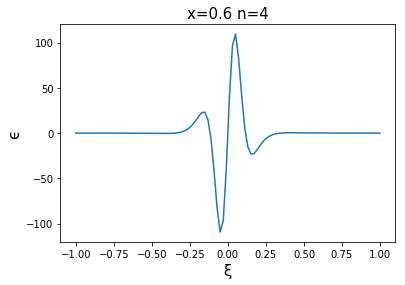

In [112]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ(0.6,t))
plt.title('x=0.6 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

Text(0, 0.5, 'ϵ')

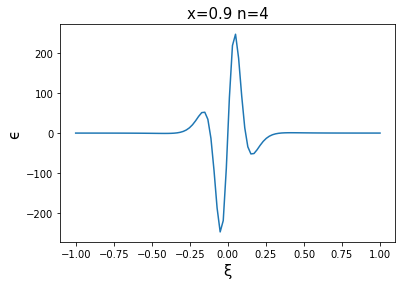

In [115]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ(0.9,t))
plt.title('x=0.9 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

### Importante: Para x=0.5 y n=4, el número de puntos es 5, por tanto uno de los puntos es 0.5 y la función de interpolación pasa por este punto. En este caso veremos que como la función y la interpolación pasan exactamente por el mismo punto, el error debe ser 0. 

Text(0, 0.5, 'ϵ')

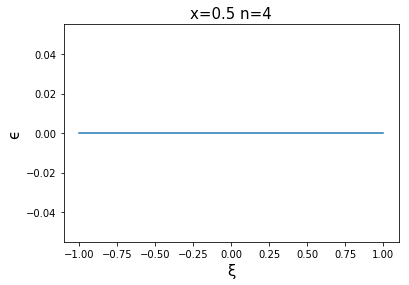

In [117]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ(0.5,t))
plt.title('x=0.5 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

# 3. Interpolación Hermite

### 1. Representar gráficamente la función junto al polinomio de interpolación de Hermite.

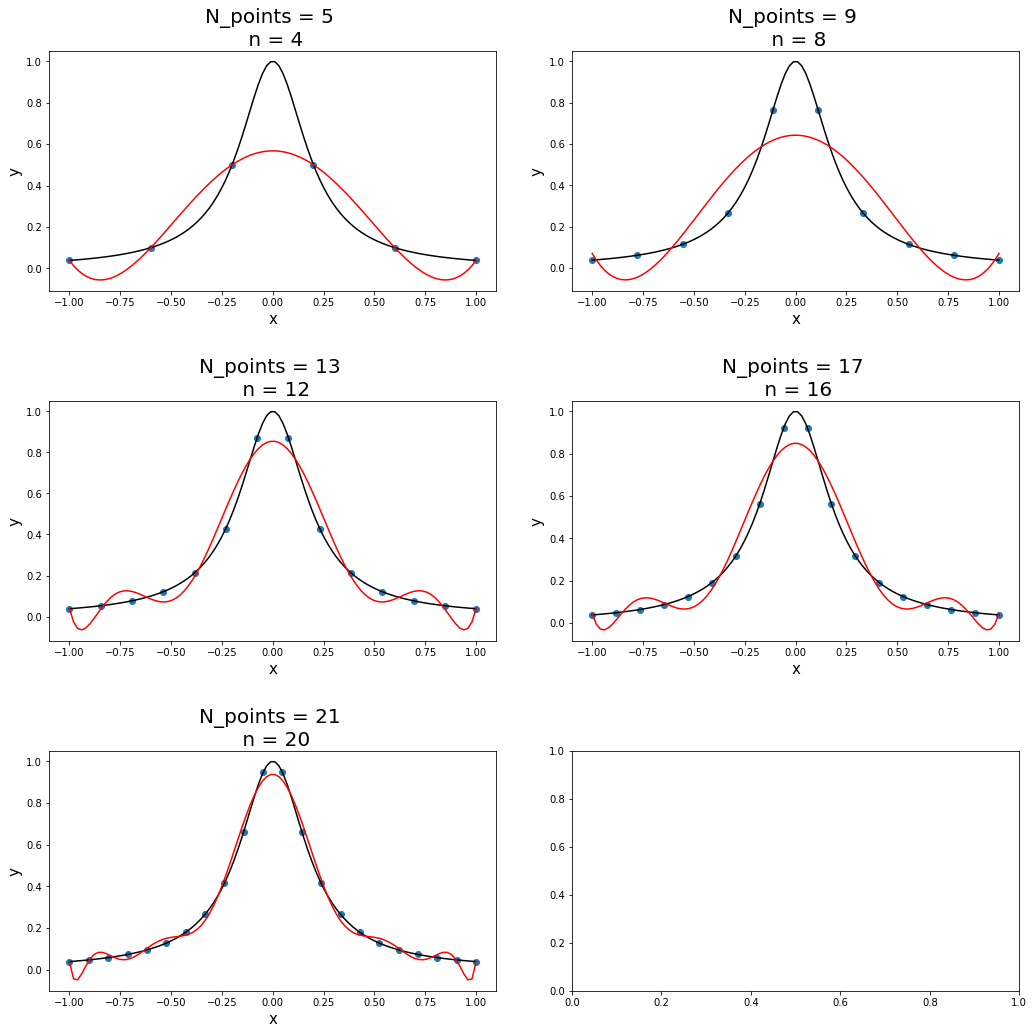

In [119]:
points = [5,9,13,17,21] # n + 1 points

fig,axs = plt.subplots(3,2,figsize=(15,15))

count = 0
for i in range(0,3):
    for j in range(0,2):
        x = np.linspace(-1,1,points[count]+1)
        t = np.linspace(-1,1,100)
        poli_hermit = np.polynomial.hermite.Hermite.fit(x,f(x),points[i]-1)
        axs[i,j].plot(x,f(x),'o')
        axs[i,j].plot(t,f(t),'k')
        axs[i,j].plot(t,poli_hermit(t),'r') 
        axs[i,j].set_title('N_points = {} \n n = {}'.format(points[count],points[count]-1),size=20)
        axs[i,j].set_xlabel('x',size=15)
        axs[i,j].set_ylabel('y',size=15)
        count += 1
        if count == len(points):
            break
fig.tight_layout(pad=3)

### 2. Comprobar gráficamente cómo el error aumenta con . Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

Para este numeral, emplee que:

La cota del error , viene dado por:
\begin{equation}
f(x)-p_{2n+1}(x)
 = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2...(x-x_n)^2,
\end{equation}

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

Para n=4 

\begin{equation}
f(x)-p_{2n+1}(x)
 = \frac{f^{10}(\xi)}{(10)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2(x-x_3)^2(x-x_4)^2,
\end{equation}


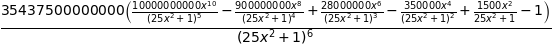

In [121]:
x = sp.Symbol('x')
f10= sp.diff(f(x),x,10)
f10

In [122]:
f10 = sp.lambdify(x,f10,'numpy')
points = np.linspace(-1,1,5)

In [123]:
ϵ_10 = lambda x,ξ: (1/np.math.factorial(10)) * (x-points[0]) * f10(ξ) * (x-points[1]) * (x-points[2]) * (x-points[3]) * (x-points[4])

Text(0, 0.5, 'ϵ')

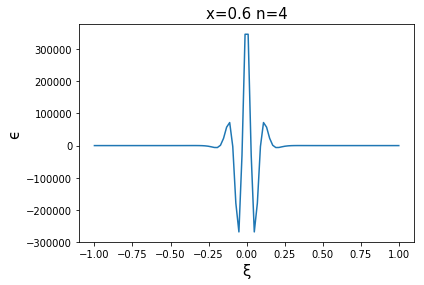

In [124]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ_10(0.6,t))
plt.title('x=0.6 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

Text(0, 0.5, 'ϵ')

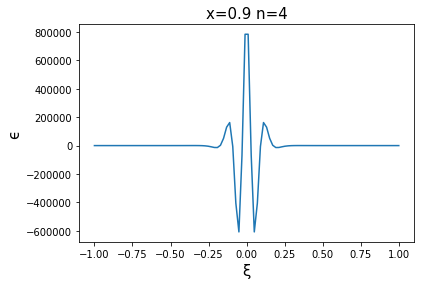

In [126]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ_10(0.9,t))
plt.title('x=0.9 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

Text(0, 0.5, 'ϵ')

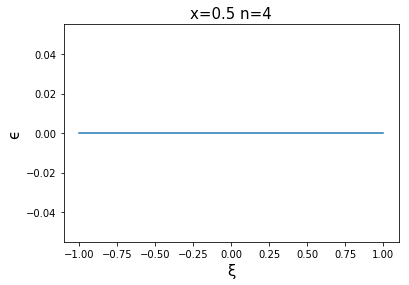

In [129]:
t = np.linspace(-1,1,100)
plt.plot(t,ϵ(0.5,t))
plt.title('x=0.5 n=4',size=15)
plt.xlabel('ξ',size=15)
plt.ylabel('ϵ',size=15)

Nota: Observe que sucede lo mismo que pasó en el caso anterior para x=0.5, al coincidir la función y la interpolación en ese punto, el error es 0. 

# 4. Spline Cúbico

### 1. Representar gráficamente la imagen, usando las órdenes imread e imshow de python (estas órdenes están contenidas en el paquete matplotlib)



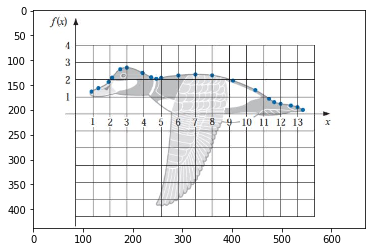

In [144]:
paloma = plt.imread('Paloma.JPG')
plt.imshow(paloma)




###  2. Definir una lista de puntos, , de la paloma.



### Los puntos se pondran en color rojo para que no se confundan con los que ya tiene la imagen de la paloma de color azul

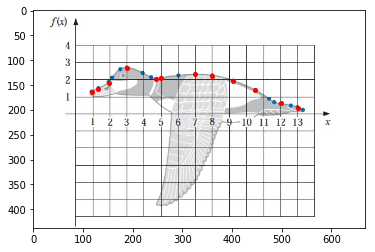

In [362]:
x = [117,131,153,189,247,257, 325,360,402,447,498,532]
y = [163,157,145,115,137,135,128,131,141,160,187,196]

plt.plot(x,y,'ro', markersize=4)
plt.imshow(paloma)

 ### 3.Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.



In [363]:
from scipy import interpolate

In [364]:
poli = interpolate.lagrange(x,y)


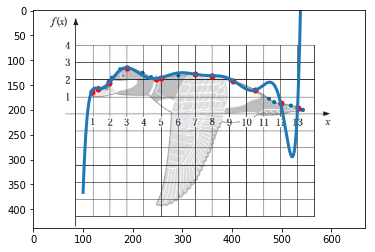

In [369]:
t=np.linspace(100,550,1000)
plt.plot(x,y,'ro', markersize=5)
plt.plot(t,poli(t),'-',linewidth=3)
plt.plot
plt.imshow(paloma)

### 4.Repetir el proceso de interpolación mediante splines cúbicos. Para ello, utilizar la función CubicSpline (contenida en scipy.interpolate)



In [370]:
cubic = interpolate.CubicSpline(x,y)

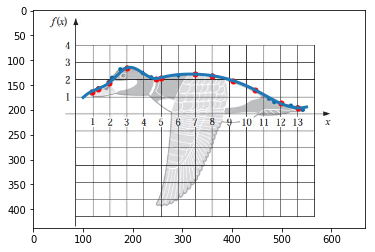

In [371]:
t=np.linspace(100,550,1000)
plt.plot(x,y,'ro', markersize=5)
plt.plot(t,cubic(t),'-',linewidth=3)
plt.plot
plt.imshow(paloma)

### 5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?


Evidentenemente se obtuvo una mejor aproximación a la forma de la paloma utilizando los splines cúbicos. Al usar la interpolación de Lagrange, el resultado presenta una serie de oscilaciones, especialmente en los valores cercanos a los puntos de los extremos. Este problema se debe principalmente a que la interpolación de lagrange utiliza polinomios de grado n-1, siendo n el número de puntos, por tanto estos polinomios son de grado muy alto cuando el número de puntos es muy alto. Por lo mismo no se escogió una cantidad mucho más grande de puntos en la paloma, ya que se presentarian incluso más oscilaciones. 